<a href="https://colab.research.google.com/github/Minecka2023/MB_Minetska_3-14/blob/main/LB8_MB_Minetska_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завантаження** **даних**

In [60]:
import pandas as pd

# Завантаження даних
url = '/content/france_data.csv'
df = pd.read_csv(url)

# Перевірка пропущених значень
missing_values = df.isnull().sum()
print("Пропущені значення:\n", missing_values)

# Перевірка формату стовпця дати
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


Пропущені значення:
 InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 **Дослідницький** **аналіз** **даних**

In [61]:
# Підсумкова статистика
summary_stats = df.describe()
print("Підсумкова статистика:\n", summary_stats)

# Аналіз різноманітності предметів в описі
unique_items = df['Description'].nunique()
print("Кількість унікальних предметів:", unique_items)

# Дослідження тенденцій з часом
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
time_trends = df.groupby('YearMonth').size()
print("Тенденції з часом:\n", time_trends)


Підсумкова статистика:
            InvoiceNo     Quantity                    InvoiceDate    UnitPrice  \
count    8408.000000  8408.000000                           3963  8408.000000   
mean   560814.379638    13.333016  2011-06-12 20:00:02.604087808     4.399713   
min    536370.000000     1.000000            2010-01-12 08:45:00     0.000000   
25%    549274.000000     6.000000            2011-04-04 11:18:00     1.250000   
50%    563288.000000    10.000000            2011-07-09 10:28:00     1.790000   
75%    571240.000000    12.000000            2011-10-08 12:35:00     3.750000   
max    581587.000000   912.000000            2011-12-10 14:46:00  4161.060000   
std     13075.973911    21.069963                            NaN    65.505260   

         CustomerID  
count   8342.000000  
mean   12678.377128  
min    12413.000000  
25%    12571.000000  
50%    12678.000000  
75%    12689.000000  
max    14277.000000  
std      277.279060  
Кількість унікальних предметів: 1563
Тенденції з

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Візуалізація**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


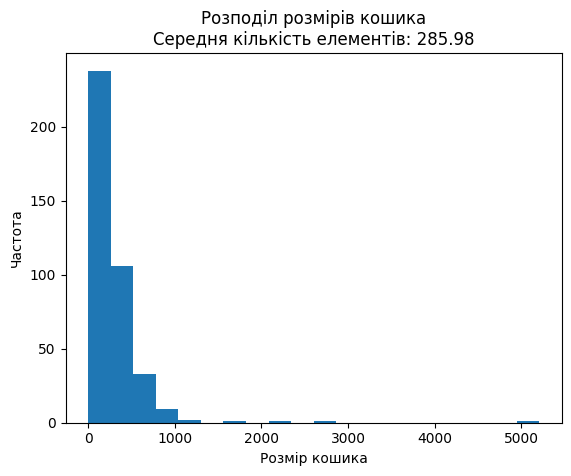

In [64]:
import matplotlib.pyplot as plt

# Гістограма розмірів кошика та середня кількість елементів
basket_size = df.groupby('InvoiceNo')['Quantity'].sum()
avg_items_per_basket = basket_size.mean()
plt.hist(basket_size, bins=20)
plt.xlabel('Розмір кошика')
plt.ylabel('Частота')
plt.title(f'Розподіл розмірів кошика\nСередня кількість елементів: {avg_items_per_basket:.2f}')
plt.show()



**Аналіз ринкового кошика**

In [63]:
from mlxtend.frequent_patterns import apriori, association_rules

# Підготовка даних для аналізу асоціацій
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Використання алгоритму Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Виведення правил асоціації та їх візуалізація
print("Правила асоціації:\n", rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Правила асоціації:
                                   antecedents  \
0                                   (POSTAGE)   
1               (4 TRADITIONAL SPINNING TOPS)   
2                 (ALARM CLOCK BAKELIKE PINK)   
3                (ALARM CLOCK BAKELIKE GREEN)   
4                  (ALARM CLOCK BAKELIKE RED)   
..                                        ...   
343  (POSTAGE, SET/6 RED SPOTTY PAPER PLATES)   
344             (SET/6 RED SPOTTY PAPER CUPS)   
345      (SET/20 RED RETROSPOT PAPER NAPKINS)   
346                                 (POSTAGE)   
347           (SET/6 RED SPOTTY PAPER PLATES)   

                                           consequents  antecedent support  \
0                        (4 TRADITIONAL SPINNING TOPS)            0.765306   
1                                            (POSTAGE)            0.071429   
2                         (ALARM CLOCK BAKELIKE GREEN)            0.102041   
3                          (ALARM CLOCK BAKELIKE PINK)            0.096939   
4

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Інтерпретація**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


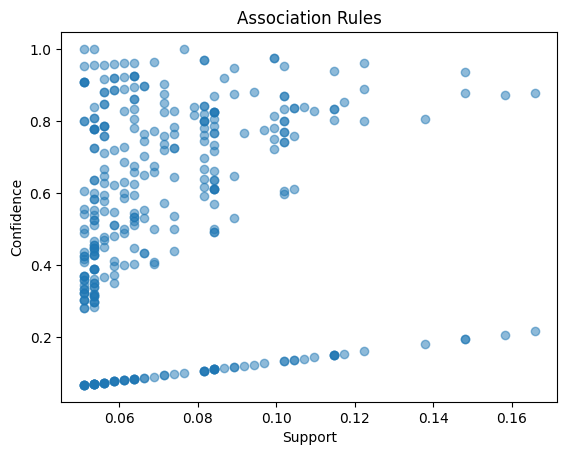

In [65]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()
